In [ ]:
Analysis of AMEO Data(from AMEO dataset)


# Introduction

# Dataset Description

The Aspiring Mind Employment Outcome 2015 (AMEO) dataset, released by Aspiring Minds, focuses on employment outcomes for engineering graduates. It includes dependent variables such as Salary, Job Titles, and Job Locations, along with standardized scores in cognitive skills, technical skills, and personality skills. With around 40 independent variables and 4000 data points, these variables encompass both continuous and categorical data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Objective
The goal of this Exploratory Data Analysis (EDA) is to extensively investigate the provided dataset, with a particular emphasis on understanding the link between various variables and the target variable, Salary.

- Providing a detailed explanation of the dataset's features.
- Find any observable patterns or trends in the data.
- Investigating the relationships between the independent factors and the target variable (salary).
- Identify any outliers

# Import the data and display the head, shape and description of the data.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('D:/Yogapriya/data.csv')

In [ ]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [ ]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Select categorical columns
categorical_columns = data.select_dtypes(include='object').columns


In [ ]:
data.shape

(3998, 39)

# Data Cleaning

In [ ]:
data.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [ ]:
data.nunique()

Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

In [ ]:
# Display the description of the data
print("\nDescription of the data:")
print(data.describe())


Description of the data:
                 ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482

In [ ]:
data.dtypes

Unnamed: 0                object
ID                         int64
Salary                   float64
DOJ                       object
DOL                       object
Designation               object
JobCity                   object
Gender                    object
DOB                       object
10percentage             float64
10board                   object
12graduation               int64
12percentage             float64
12board                   object
CollegeID                  int64
CollegeTier                int64
Degree                    object
Specialization            object
collegeGPA               float64
CollegeCityID              int64
CollegeCityTier            int64
CollegeState              object
GraduationYear             int64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
Mechanical

In [ ]:
data = data.drop(columns = ['Unnamed: 0', 'ID','CollegeID','CollegeCityID'])
data.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
# Replace NaT values with '2015-12-31' (optional)
data['DOL'].replace('present', pd.to_datetime('2015-12-31'), inplace=True)

# Convert 'DOL' to datetime
data['DOL'] = pd.to_datetime(data['DOL'])

# Convert 'DOJ' to datetime
data['DOJ'] = pd.to_datetime(data['DOJ'])

# Display the updated DataFrame
data.head()


C:\Users\priya\AppData\Local\Temp\ipykernel_32464\2994050043.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DOJ'] = pd.to_datetime(data['DOJ'])


,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,2013-09-01,2015-12-31,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,2014-06-01,2015-12-31,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,2014-03-01,2015-03-01,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
categorical = ['Designation','JobCity', 'Gender','10board','12board','CollegeTier','Degree',
              'Specialization','CollegeCityTier','CollegeState']
for cat in categorical:
    data[cat] = data[cat].astype('category')

In [ ]:
data.dtypes

Salary                          float64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                    category
JobCity                        category
Gender                         category
DOB                              object
10percentage                    float64
10board                        category
12graduation                      int64
12percentage                    float64
12board                        category
CollegeTier                    category
Degree                         category
Specialization                 category
collegeGPA                      float64
CollegeCityTier                category
CollegeState                   category
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64
ComputerProgramming               int64
ElectronicsAndSemicon             int64


In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Display the percentage of missing values for each column
print(missing_percentage)


Salary                   0.0
DOJ                      0.0
DOL                      0.0
Designation              0.0
JobCity                  0.0
Gender                   0.0
DOB                      0.0
10percentage             0.0
10board                  0.0
12graduation             0.0
12percentage             0.0
12board                  0.0
CollegeTier              0.0
Degree                   0.0
Specialization           0.0
collegeGPA               0.0
CollegeCityTier          0.0
CollegeState             0.0
GraduationYear           0.0
English                  0.0
Logical                  0.0
Quant                    0.0
Domain                   0.0
ComputerProgramming      0.0
ElectronicsAndSemicon    0.0
ComputerScience          0.0
MechanicalEngg           0.0
ElectricalEngg           0.0
TelecomEngg              0.0
CivilEngg                0.0
conscientiousness        0.0
agreeableness            0.0
extraversion             0.0
nueroticism              0.0
openess_to_exp

In [ ]:
data['DOB'] = pd.to_datetime(data['DOB'])
data['Age'] = 2015 - data['DOB'].dt.year
data.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age
0,420000.0,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,25
1,500000.0,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,26
2,325000.0,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,23
3,1100000.0,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,26
4,200000.0,2014-03-01,2015-03-01,software engineer,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,24


In [ ]:
data.dtypes

Salary                          float64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                    category
JobCity                        category
Gender                         category
DOB                      datetime64[ns]
10percentage                    float64
10board                        category
12graduation                      int64
12percentage                    float64
12board                        category
CollegeTier                    category
Degree                         category
Specialization                 category
collegeGPA                      float64
CollegeCityTier                category
CollegeState                   category
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64
ComputerProgramming               int64
ElectronicsAndSemicon             int64


In [ ]:
# Replace 'get' with the mode of the 'Designation' column
mode_designation = data['Designation'].mode()[0]  # Calculate the mode
data['Designation'] = data['Designation'].replace('get', mode_designation)

# Display the updated DataFrame
print(data['Designation'])


0           senior quality engineer
1                 assistant manager
2                  systems engineer
3          senior software engineer
4                 software engineer
                   ...             
3993              software engineer
3994               technical writer
3995    associate software engineer
3996             software developer
3997        senior systems engineer
Name: Designation, Length: 3998, dtype: category
Categories (418, object): ['.net developer', '.net web developer', 'account executive', 'account manager', ..., 'web developer', 'web intern', 'website developer/tester', 'windows systems administrator']


# Univariate Analysis
# PDF AND HISTOGRAM
# SALARY

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


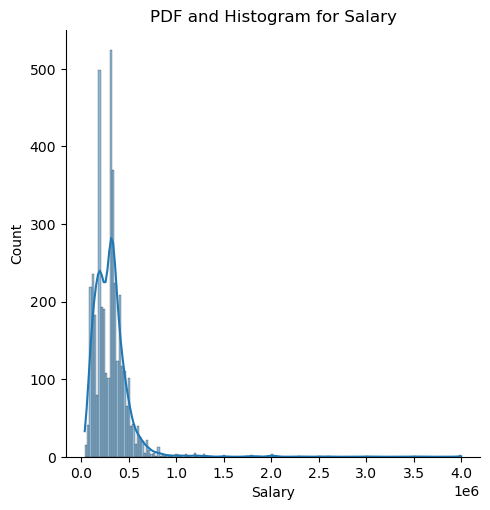

In [ ]:


# List of columns to visualize
columns_to_visualize = ['Salary']

# PDFs, Histograms for specified columns
for col in columns_to_visualize:
    if col in df.columns and df[col].dtype in ['float64', 'int64']:
        # PDF and Histogram
        sns.displot(df[col], kde=True)
        plt.title(f'PDF and Histogram for {col}')
        plt.show()




# ENGLISH

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


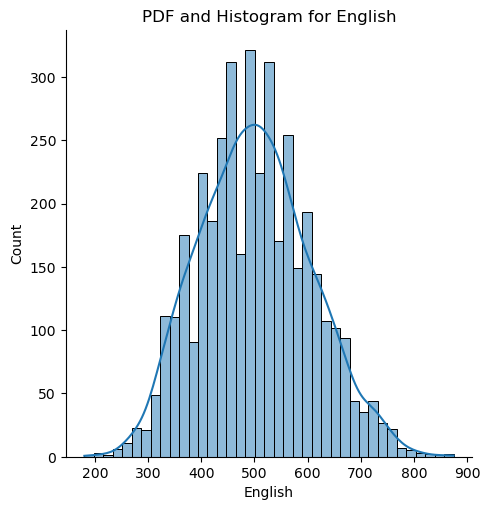

In [ ]:


# List of columns to visualize
columns_to_visualize = ['English']

# PDFs, Histogramsfor specified columns
for col in columns_to_visualize:
    if col in df.columns and df[col].dtype in ['float64', 'int64']:
        # PDF and Histogram
        sns.displot(df[col], kde=True)
        plt.title(f'PDF and Histogram for {col}')
        plt.show()



# 10 PERCENTAGE

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


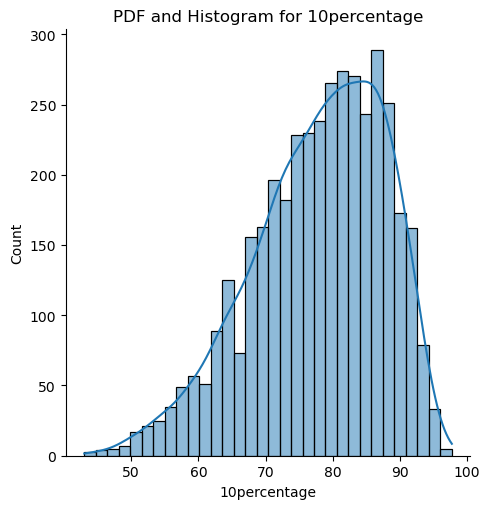

In [ ]:


# List of columns to visualize
columns_to_visualize = ['10percentage']

# PDFs, Histograms specified columns
for col in columns_to_visualize:
    if col in df.columns and df[col].dtype in ['float64', 'int64']:
        # PDF and Histogram
        sns.displot(df[col], kde=True)
        plt.title(f'PDF and Histogram for {col}')
        plt.show()



# COUNTPLOT
# GENDER

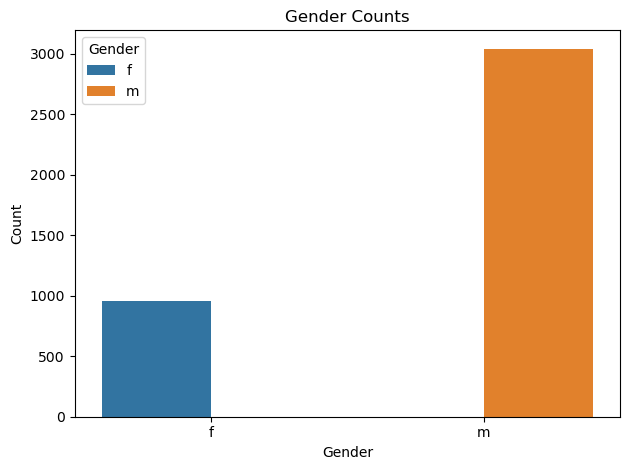

In [ ]:
sns.countplot(x='Gender', data=data, hue='Gender')
plt.title('Gender Counts')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# DEGREE

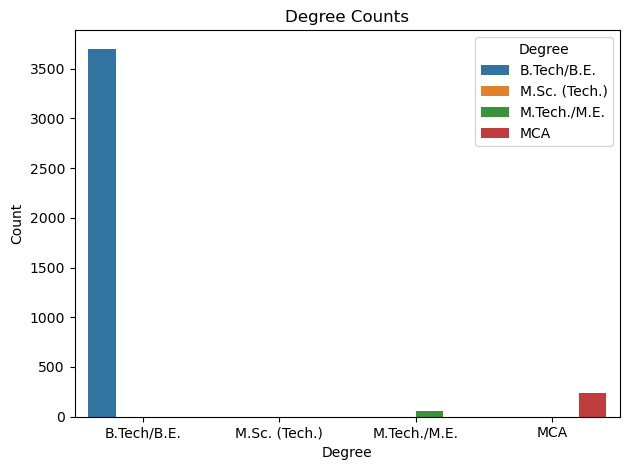

In [ ]:
sns.countplot(x='Degree', data=data, hue='Degree')
plt.title('Degree Counts')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# OUTLIERS FOR NUMERICAL COLUMN - BOX PLOT

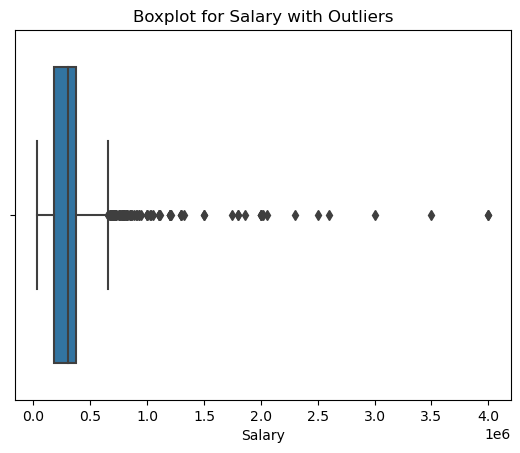

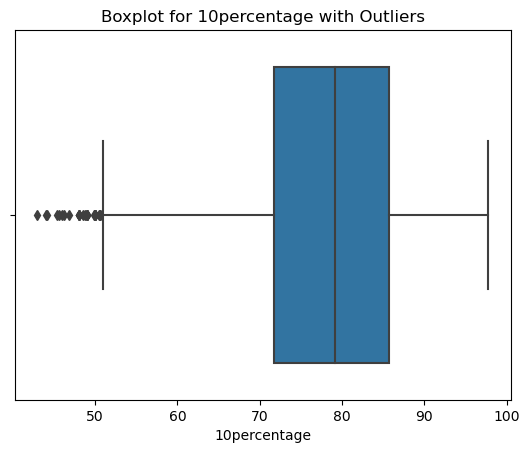

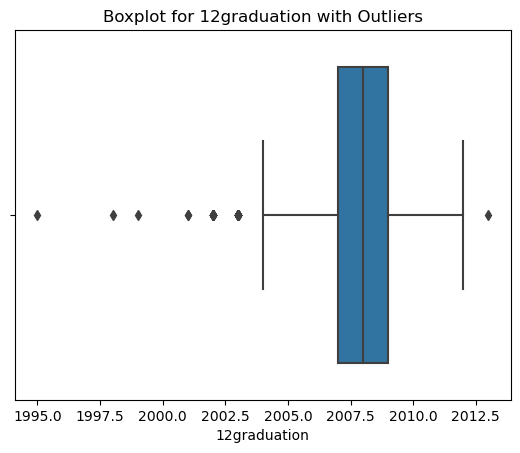

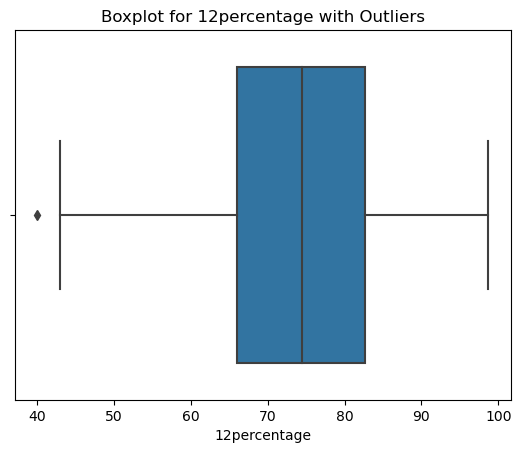

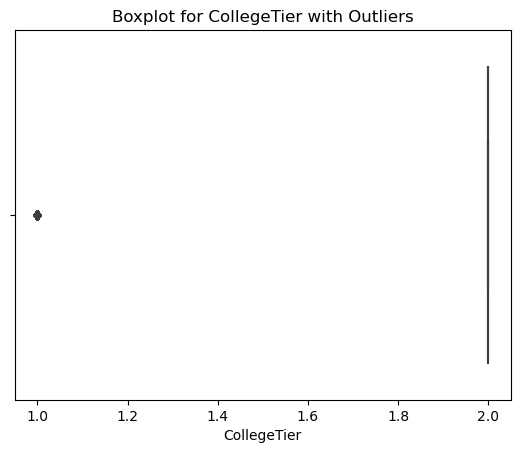

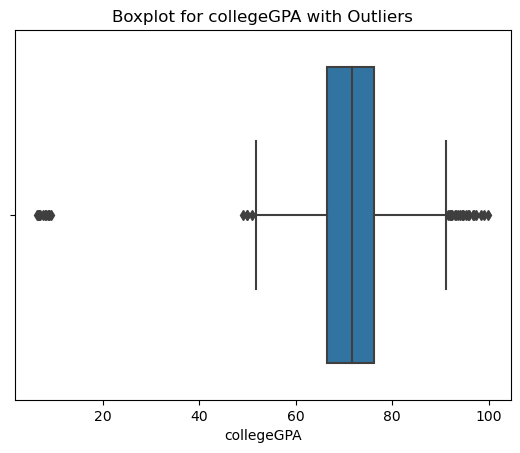

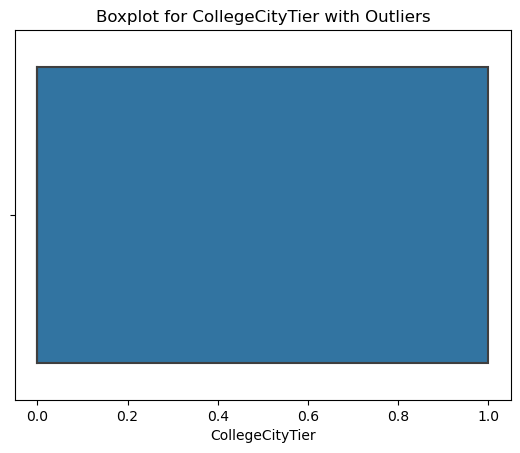

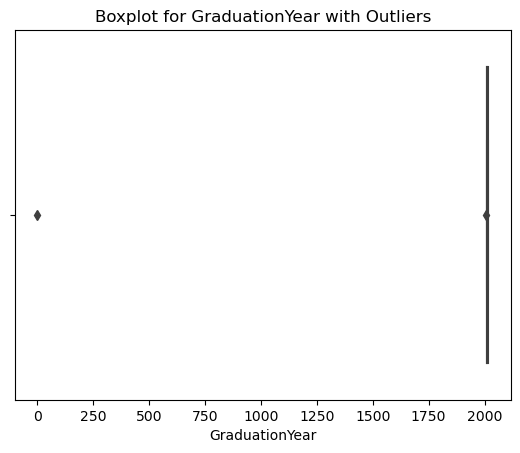

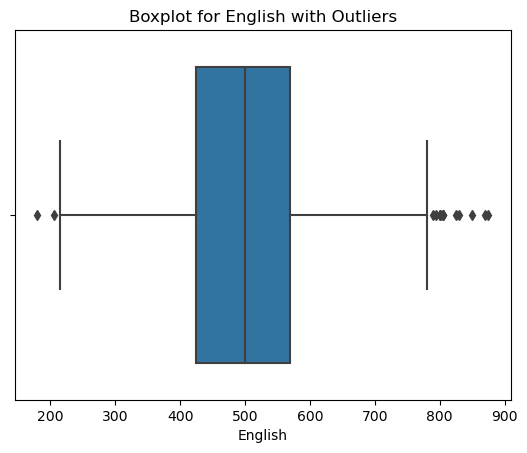

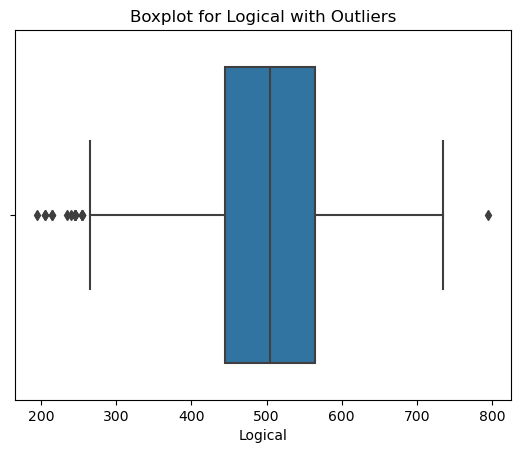

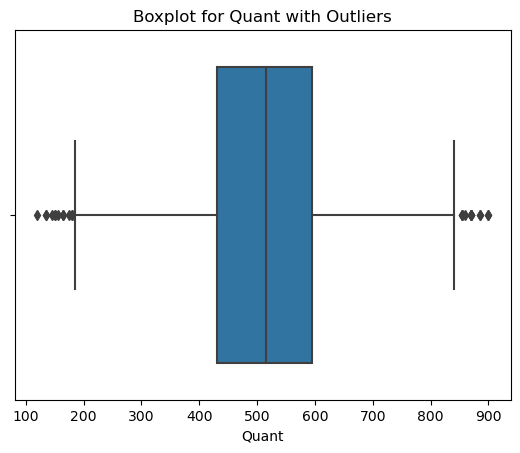

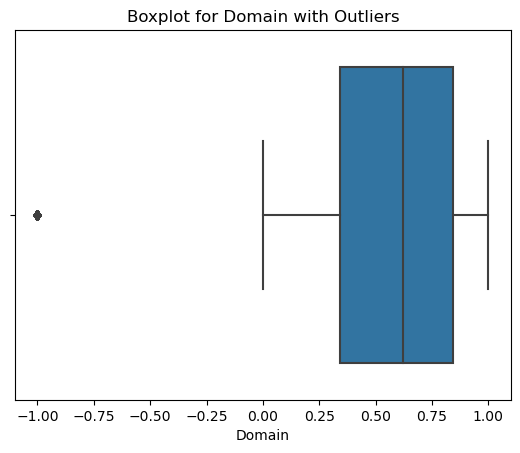

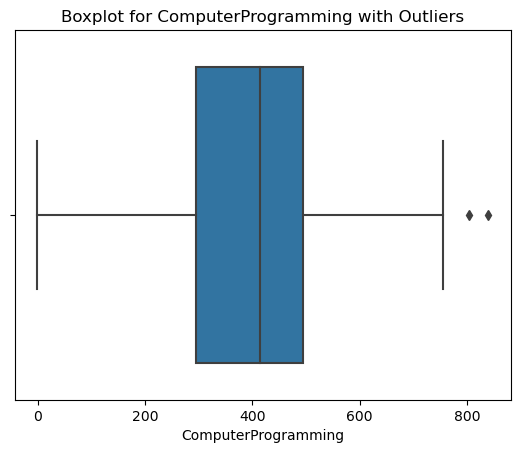

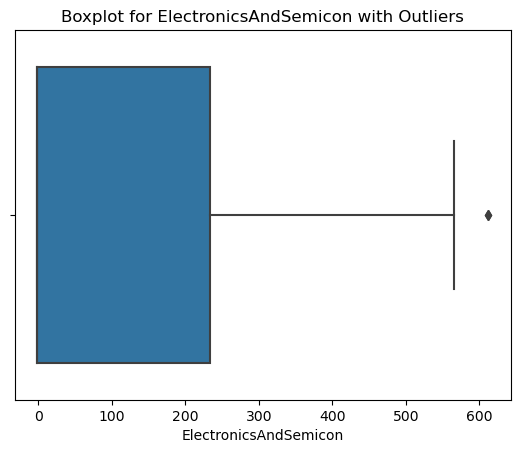

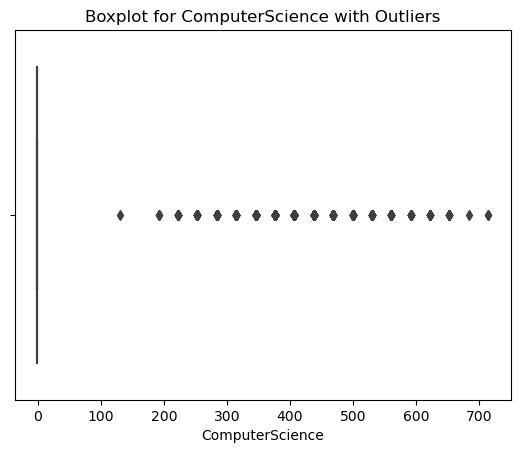

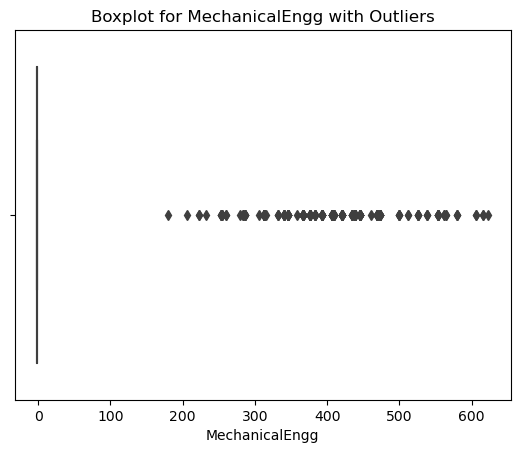

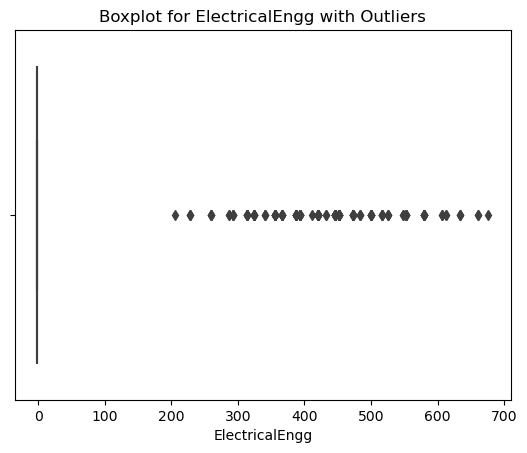

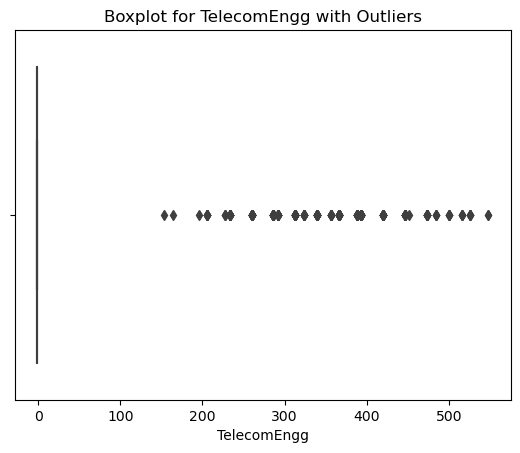

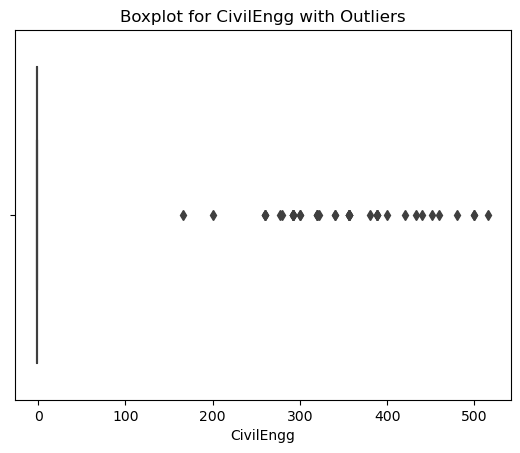

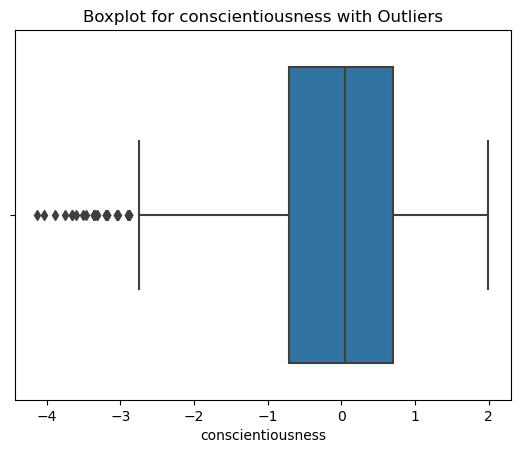

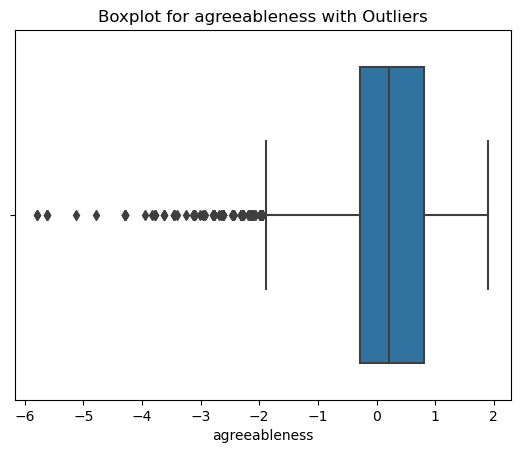

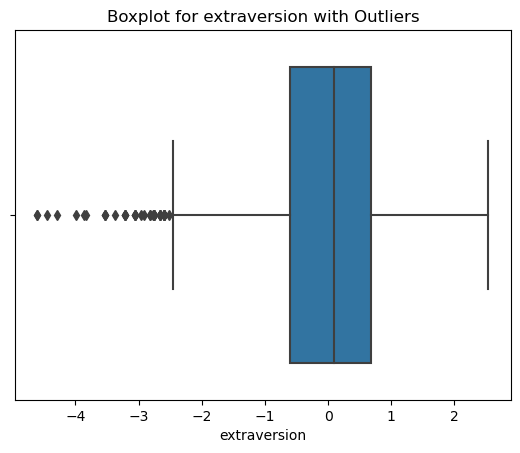

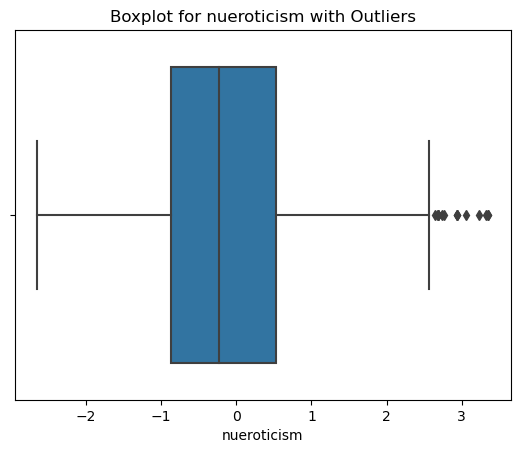

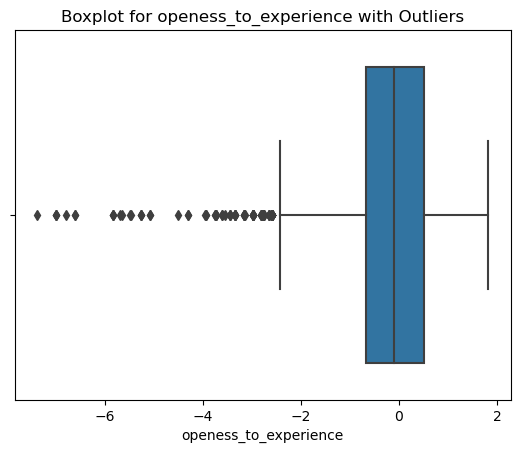

In [ ]:
 #Find the outliers in each numerical column
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col} with Outliers')
    plt.show()


# Bivariate Analysis
# CATEGORICAL-CATEGORICAL GENDER-AGE

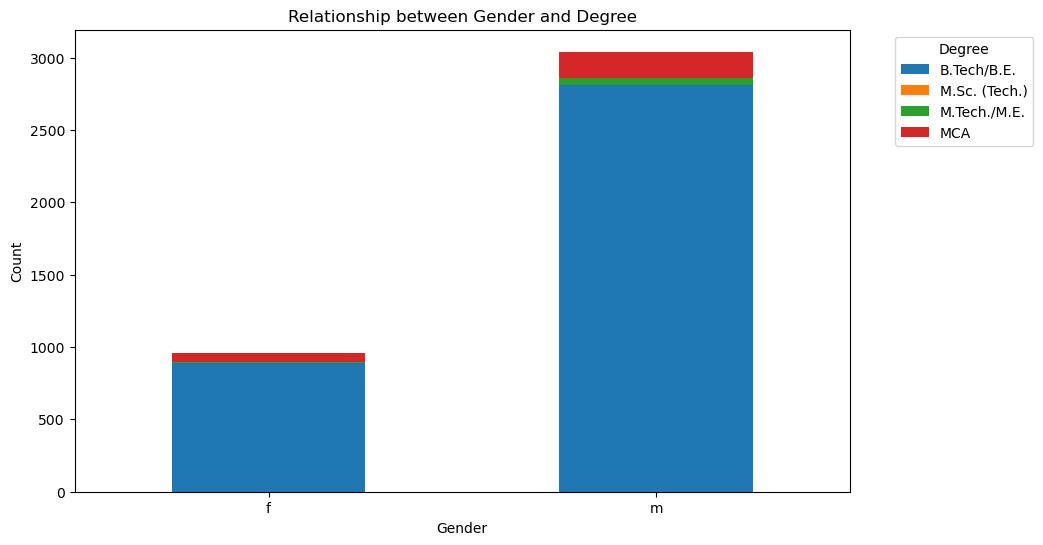

In [ ]:
cross_table = pd.crosstab(data['Gender'], data['Degree'])

# Plot stacked bar chart
cross_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between Gender and Degree')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Adjust rotation for better readability
plt.legend(title='Degree', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# CONTINUOUS-CATEGORICAL SALARY-GENDER

C:\Users\priya\AppData\Local\Temp\ipykernel_32464\4042024017.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Salary', data=data, ci=None)


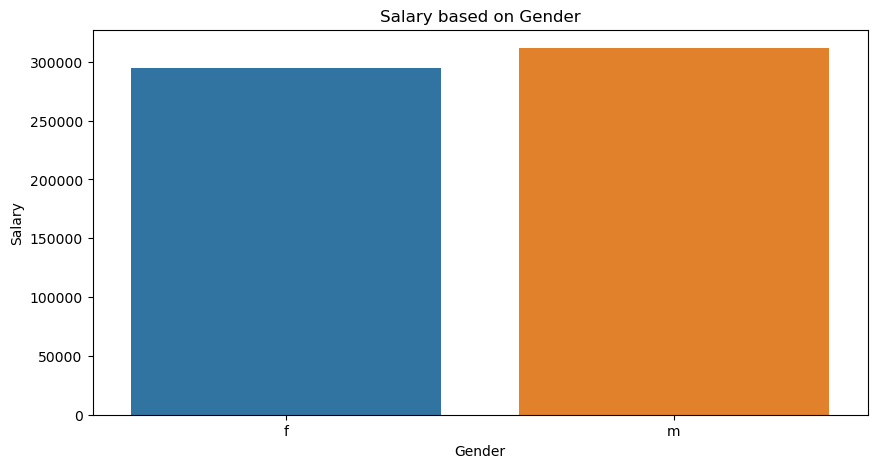

In [ ]:
plt.figure(figsize=(10, 5))

# Bar plot for Salary vs Gender
sns.barplot(x='Gender', y='Salary', data=data, ci=None)
plt.title('Salary based on Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

# CONTINUOS-CONTINUOS SALARY-AGE

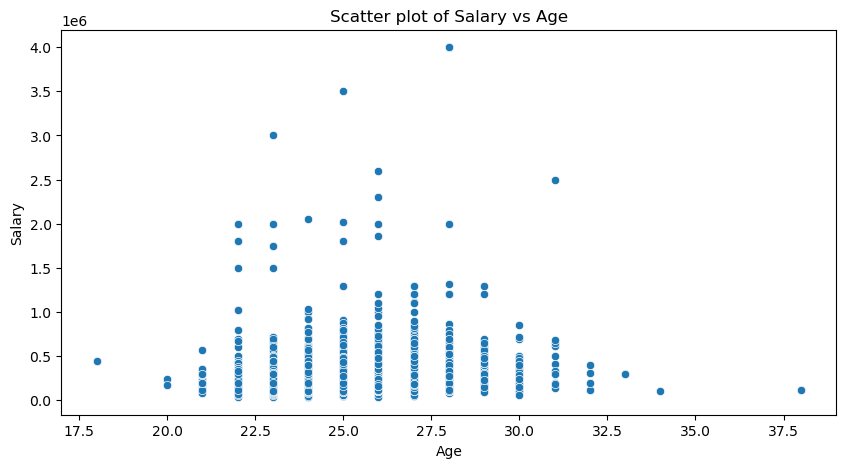

In [ ]:
plt.figure(figsize=(10, 5))

# Scatter plot for Salary vs Age
sns.scatterplot(x='Age', y='Salary', data=data)
plt.title('Scatter plot of Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

# SALARY - COLLEGE GPA

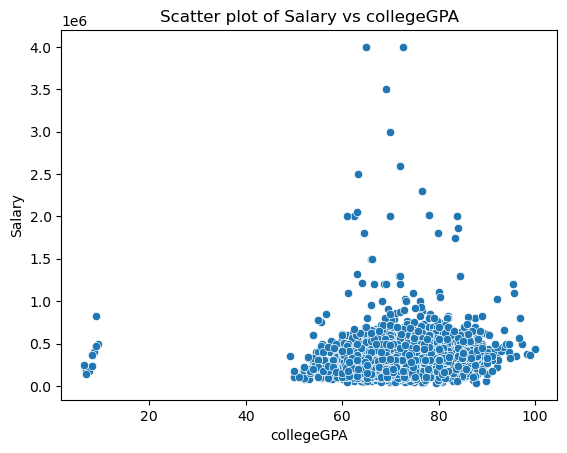

In [ ]:
# Scatter plot for Salary vs college GPA
sns.scatterplot(x='collegeGPA', y='Salary', data=data)
plt.title('Scatter plot of Salary vs collegeGPA')
plt.xlabel('collegeGPA')
plt.ylabel('Salary')
plt.show()

# Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

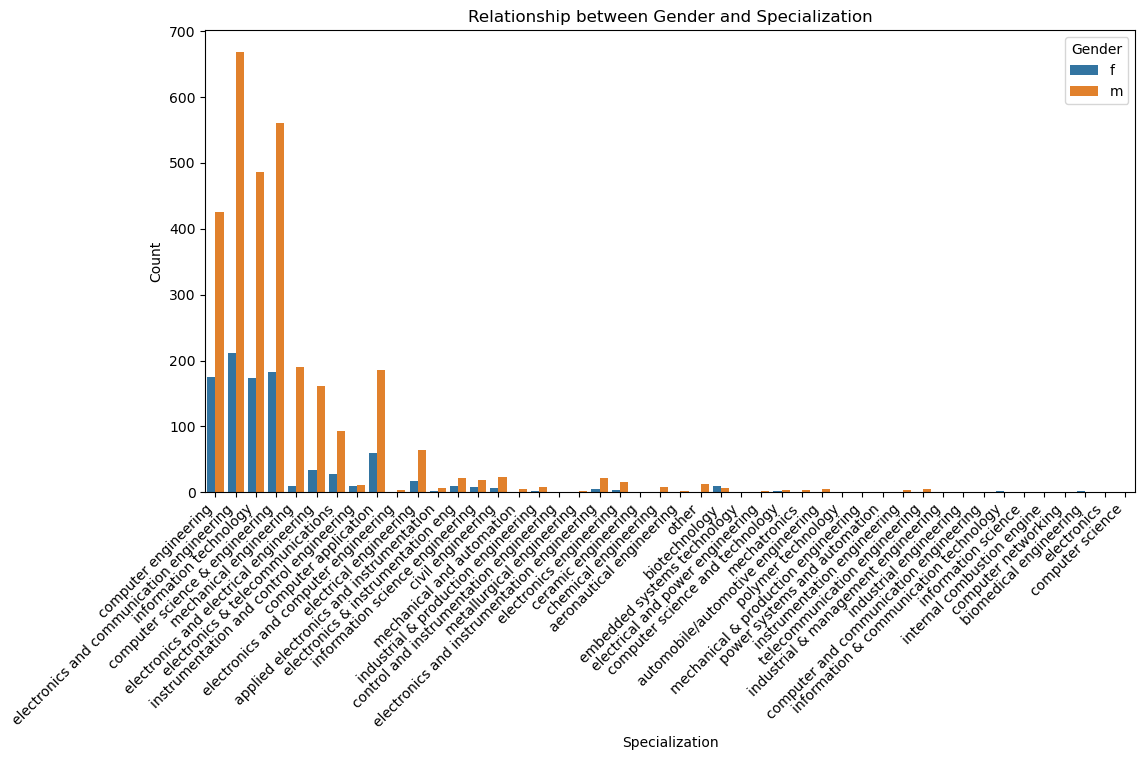

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Specialization', hue='Gender', data=df)
plt.title('Relationship between Gender and Specialization')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Gender')
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming data is your DataFrame
observed_table = pd.crosstab(data['Gender'], data['Specialization'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(observed_table)

# Display the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)


Chi-square value: 104.46891913608455
P-value: 1.2453868176976918e-06
Degrees of freedom: 45
Expected frequencies table:
[[7.18109055e-01 2.15432716e+00 1.19684842e+00 4.78739370e-01
  3.59054527e+00 2.39369685e-01 2.15432716e+00 6.94172086e+00
  2.39369685e-01 5.84062031e+01 1.43621811e+02 2.39369685e-01
  4.78739370e-01 1.78091046e+02 1.43621811e+00 2.39369685e-01
  4.78739370e-01 1.96283142e+01 2.39369685e-01 7.65982991e+00
  2.89637319e+01 2.10645323e+02 7.18109055e-01 4.69164582e+01
  6.46298149e+00 4.54802401e+00 2.39369685e-01 2.39369685e-01
  2.39369685e+00 4.78739370e-01 4.78739370e-01 2.39369685e-01
  6.46298149e+00 1.57983992e+02 4.78739370e+00 9.57478739e-01
  2.39369685e-01 2.39369685e-01 1.19684842e+00 4.81133067e+01
  9.57478739e-01 4.78739370e-01 3.11180590e+00 2.39369685e-01
  2.39369685e-01 1.43621811e+00]
 [2.28189095e+00 6.84567284e+00 3.80315158e+00 1.52126063e+00
  1.14094547e+01 7.60630315e-01 6.84567284e+00 2.20582791e+01
  7.60630315e-01 1.85593797e+02 4.5637818

# OBSERVATION
The chi-square value is 104.47 with 45 degrees of freedom. A higher chi-square value suggests a stronger association between gender and specialization.

The p-value is approximately 1.25e-06, which is less than the common significance level of 0.05. Therefore, we reject the null hypothesis, indicating that there is a significant association between gender and specialization.
    Examining the expected frequencies for each specialization and gender combination, we can observe the expected distribution if there were no association. The observed counts significantly deviate from these expected values, leading to the rejection of the null hypothesis.

    The bar plot you created earlier visually represents the count distribution of different specializations among genders.

In conclusion, there is evidence to suggest that gender and specialization are not independent, and there is a relationship between the two variables in the dataset.

# CONCLUSION
Data Understanding:
    You've provided an overview of the dataset, focusing on employment outcomes and standardized scores.
    Mentioned the initial dimensions of the dataset (3998 rows, 39 columns).
    Noted the presence of duplicate values and initiated data manipulation.

Data Manipulation:
    Highlighted the removal of redundant rows and columns.
    Acknowledged the need for handling missing values (NaN).

Data Visualization:
    Conducted univariate analysis with PDFs, histograms, box plots, and count plots.
    Executed bivariate analysis using scatterplots and bar plots.